In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab
from sets import Set
import calendar
import seaborn as sns
import seawater as SW
import copy
import os
from mpl_toolkits.basemap import Basemap
from scipy.interpolate import griddata
import scipy.io as sio
import ACTDR

# switch to unbuffered output
# we create a class that overrides the write function of a stream object
# in this write function, we call the super write, then we also flush
# the stream -- this has the effect of forcing output to the screen after 
# every write
class Unbuffered(object):
    def __init__(self, stream):
        self.stream = stream
    def write(self, data):
        self.stream.write(data)
        self.stream.flush()
    def __getattr__(self, attr):
        return getattr(self.stream, attr)

import sys
sys.stdout = Unbuffered(sys.stdout)

%matplotlib inline

In [13]:
sns.set()
sns.set_style("darkgrid")
sns.set_context("poster")

In [3]:
ACTDR.load_dat('DB_v01.dat')
print '> ', str(len(ACTDR.CTD_DAT)), ' casts'

> open  DB_v01.dat
> load CTD_DAT
> load STANDARD_KEYS
> close  DB_v01.dat
> complete
>  114582  casts


In [4]:
S = [x for k in ACTDR.CTD_DAT for x in k['Salinity']]
T = [x for k in ACTDR.CTD_DAT for x in k['Temperature']]

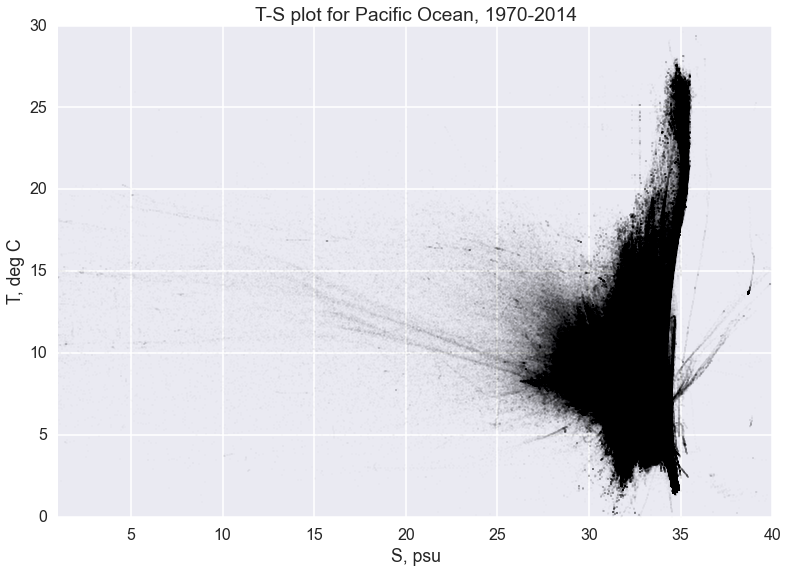

In [18]:
plt.plot(S,T,'.k',ms=1,alpha=0.25)
plt.xlim((1,40))
plt.ylim((0,30))
plt.xlabel('S, psu')
plt.ylabel('T, deg C')
plt.title('T-S plot for Pacific Ocean, 1970-2014')
plt.show()

In [11]:
yrs = np.arange(1970,2015)
cast_yrs = np.zeros(len(yrs))
for cast in ACTDR.CTD_DAT:
    if cast['Year'] >= 1970 and cast['Year'] < 2015:
        cast_yrs[cast['Year']-1970] = cast_yrs[cast['Year']-1970]+1

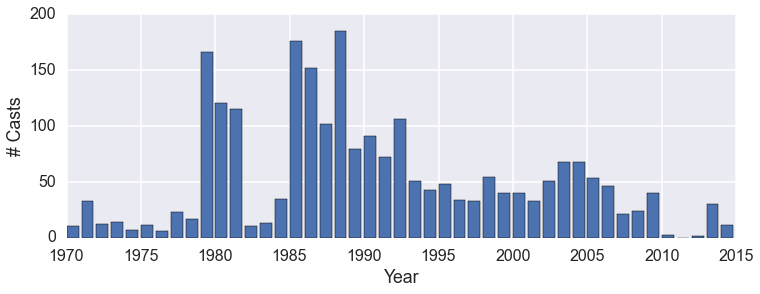

In [14]:
plt.figure(figsize=(12,4))
plt.bar(yrs,cast_yrs)
plt.xlabel('Year')
plt.ylabel('# Casts')
plt.show()

In [10]:
rm_ind = []
for ii,cast in enumerate(ACTDR.CTD_DAT):
    if cast['Latitude'] < 48.2 or cast['Latitude'] > 48.6 or cast['Longitude'] < -125.6 or cast['Longitude'] > -124.8:
        rm_ind.append(ii)
for ii in rm_ind[::-1]:
    del ACTDR.CTD_DAT[ii]
    
print '> ', len(ACTDR.CTD_DAT), ' casts'
ACTDR.save_dat('JdFE_v01.dat')

>  2347  casts
> open  JdFE_v01.dat
> dump CTD_DAT
> dump STANDARD_KEYS
> close  JdFE_v01.dat
> complete
